We want to replicate a figure made by Anca and her student on a poster, which looks at the relationship between luminosity and redshift for the SDSS DR7 galaxy sample, separated by void and wall environments.

In [2]:
from astropy.io import fits
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Data

In [4]:
data_directory = '../../../data/'
data_filename = data_directory + 'NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdu = fits.open(data_filename)
data = Table(hdu[1].data)
hdu.close()

## Just keep the main SDSS DR7 footprint

In [5]:
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]
del catalog_north

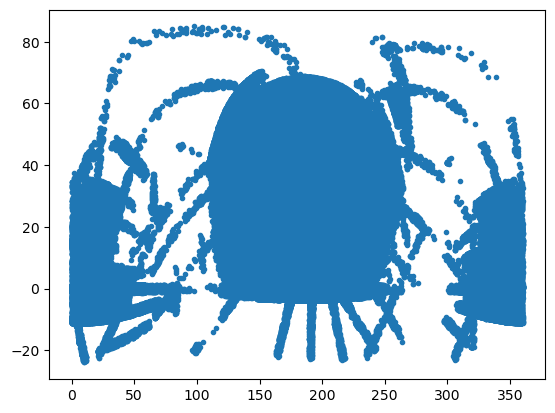

In [19]:
plt.figure()

plt.plot(data['RA'], data['DEC'], '.')

## Separate galaxies by their LSS classifications

In [23]:
wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge = catalog_main['vflag_VF'] == 2

In [7]:
all_wall = data['vflag_VF'] == 0
all_void = data['vflag_VF'] == 1

In [8]:
dr7_wall = catalog_SDSS['vflag_VF'] == 0
dr7_void = catalog_SDSS['vflag_VF'] == 1

# Plots

## All galaxies, no environment

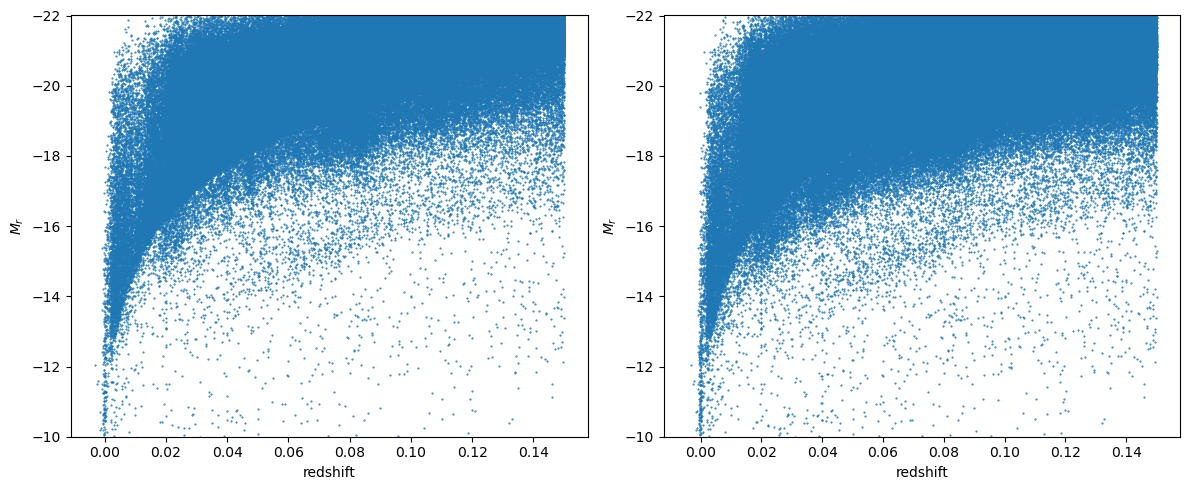

In [18]:
plt.figure(tight_layout=True, figsize=(12,5))

plt.subplot(121)
plt.plot(catalog_main['Z'], catalog_main['ELPETRO_ABSMAG'][:,4], '.', markersize=1)
plt.xlabel('redshift')
plt.ylabel('$M_r$')
plt.ylim([-10,-22])

plt.subplot(122)
plt.plot(data['Z'], data['ELPETRO_ABSMAG'][:,4], '.', markersize=1)
plt.xlabel('redshift')
plt.ylabel('$M_r$')
plt.ylim([-10,-22]);

## Galaxies with environments

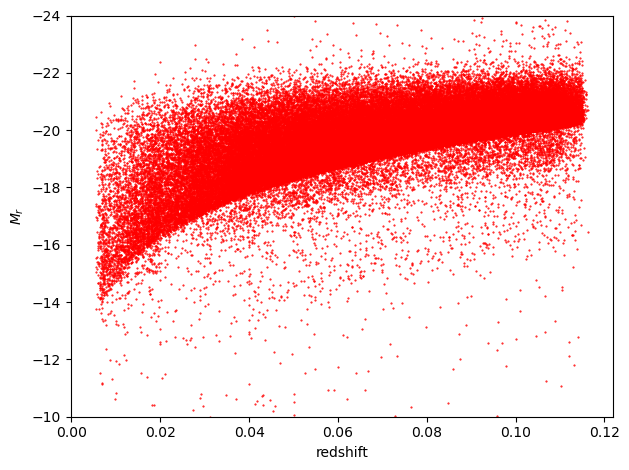

In [27]:
plt.figure(tight_layout=True)

#plt.plot(catalog_main['Z'][edge], catalog_main['ELPETRO_ABSMAG'][:,4][edge], 'g.', markersize=1)
#plt.plot(catalog_main['Z'][wall_vf], catalog_main['ELPETRO_ABSMAG'][:,4][wall_vf], 'k.', markersize=1)
plt.plot(catalog_main['Z'][void_vf], catalog_main['ELPETRO_ABSMAG'][:,4][void_vf], 'r.', markersize=1)

plt.xlabel('redshift')
plt.ylabel('$M_r$')
plt.ylim([-10,-24]);

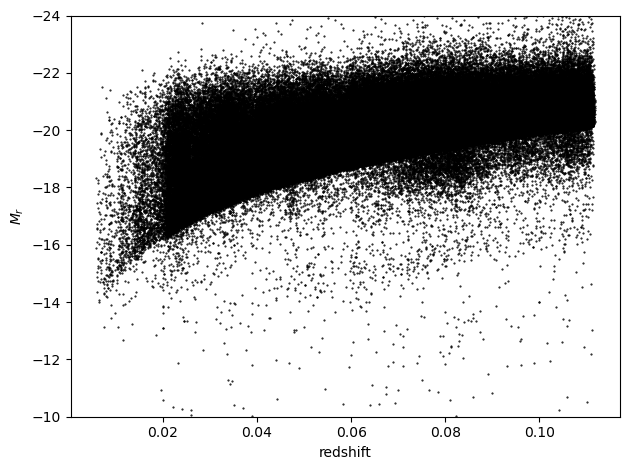

In [28]:
plt.figure(tight_layout=True)

#plt.plot(catalog_main['Z'][edge], catalog_main['ELPETRO_ABSMAG'][:,4][edge], 'g.', markersize=1)
plt.plot(catalog_main['Z'][wall_vf], catalog_main['ELPETRO_ABSMAG'][:,4][wall_vf], 'k.', markersize=1)
#plt.plot(catalog_main['Z'][void_vf], catalog_main['ELPETRO_ABSMAG'][:,4][void_vf], 'r.', markersize=1)

plt.xlabel('redshift')
plt.ylabel('$M_r$')
plt.ylim([-10,-24]);